In [5]:
!pip install pandas_datareader


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [82]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [83]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.764324,35.662958,27.081049,29.246882,855215656
2007-10-08,31.087019,33.871660,30.891605,33.871660,126671715
2007-10-09,33.204006,33.497125,29.426012,31.103310,116725709
2007-10-10,33.513409,34.197356,33.220289,34.067080,67931378
2007-10-11,37.258827,39.082686,33.220285,39.082686,106320954


In [84]:
df.shape

(4208, 5)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4208 non-null   float64
 1   (High, POWERGRID.NS)    4208 non-null   float64
 2   (Low, POWERGRID.NS)     4208 non-null   float64
 3   (Open, POWERGRID.NS)    4208 non-null   float64
 4   (Volume, POWERGRID.NS)  4208 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 197.2 KB


In [86]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [87]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4208.000000,4208.000000,4208.000000,4208.000000,4.208000e+03
mean,80.182832,81.225242,79.153128,80.220121,1.188963e+07
std,64.365734,65.118008,63.564661,64.347148,2.061999e+07
min,19.129536,20.448814,17.150619,20.349867,0.000000e+00
25%,36.774819,37.354998,36.231704,36.812472,4.799653e+06
50%,55.878262,56.523444,55.130447,55.985533,8.344398e+06
75%,83.671991,84.670719,82.679817,83.694753,1.362032e+07
max,360.278564,361.067223,352.145309,358.898352,8.552157e+08


In [88]:
df = df.reset_index()

In [89]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [90]:
df.to_csv("powergrid.csv")

In [91]:
data01 = pd.read_csv("powergrid.csv")

In [92]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.76432418823242,35.66295790351814,27.08104880255562,29.246882194513173,855215656
2,1,2007-10-08,31.087018966674805,33.87165995743675,30.89160471132606,33.87165995743675,126671715
3,2,2007-10-09,33.20400619506836,33.497125449115735,29.426012427790123,31.103310109088206,116725709
4,3,2007-10-10,33.51340866088867,34.19735649763172,33.22028942155311,34.06707956225587,67931378


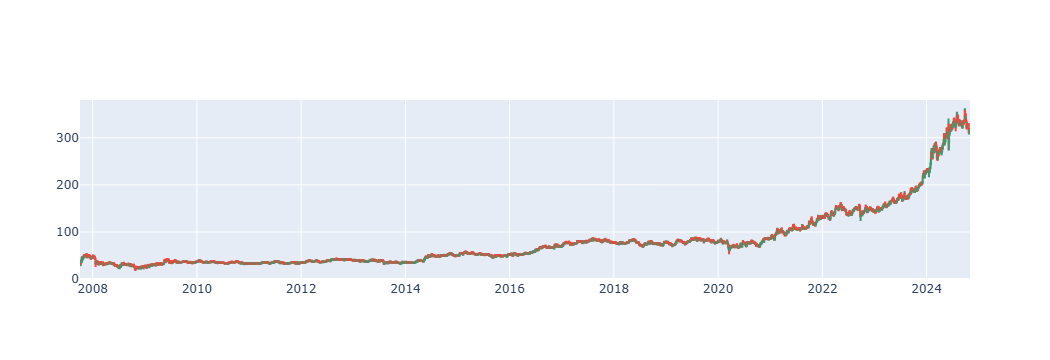

In [93]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [94]:
df = df.drop(columns=['Date', 'Adj Close'], errors='ignore')


C:\Users\ArulPrakash A\AppData\Local\Temp\ipykernel_12128\3610633860.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [95]:
#df = df.drop(['Date', 'Adj Close'], axis = 1)

In [96]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.764324,35.662958,27.081049,29.246882,855215656
1,31.087019,33.871660,30.891605,33.871660,126671715
2,33.204006,33.497125,29.426012,31.103310,116725709
3,33.513409,34.197356,33.220289,34.067080,67931378
4,37.258827,39.082686,33.220285,39.082686,106320954


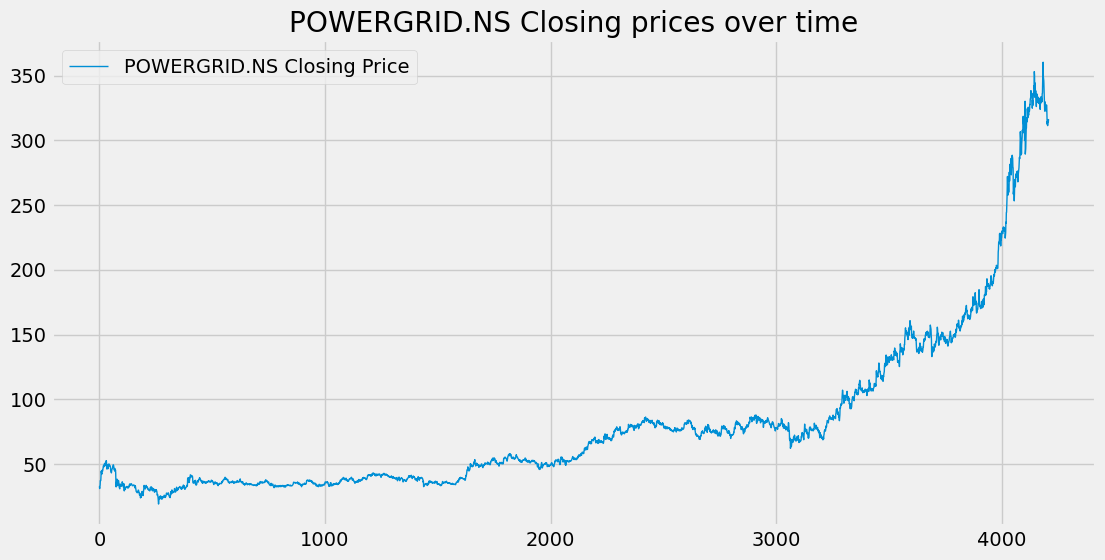

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

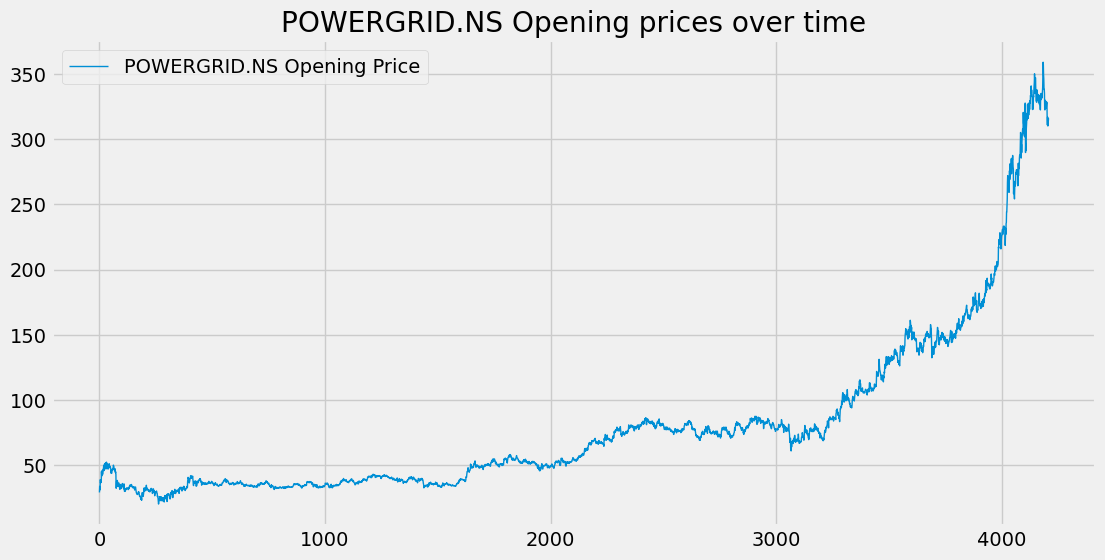

In [105]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

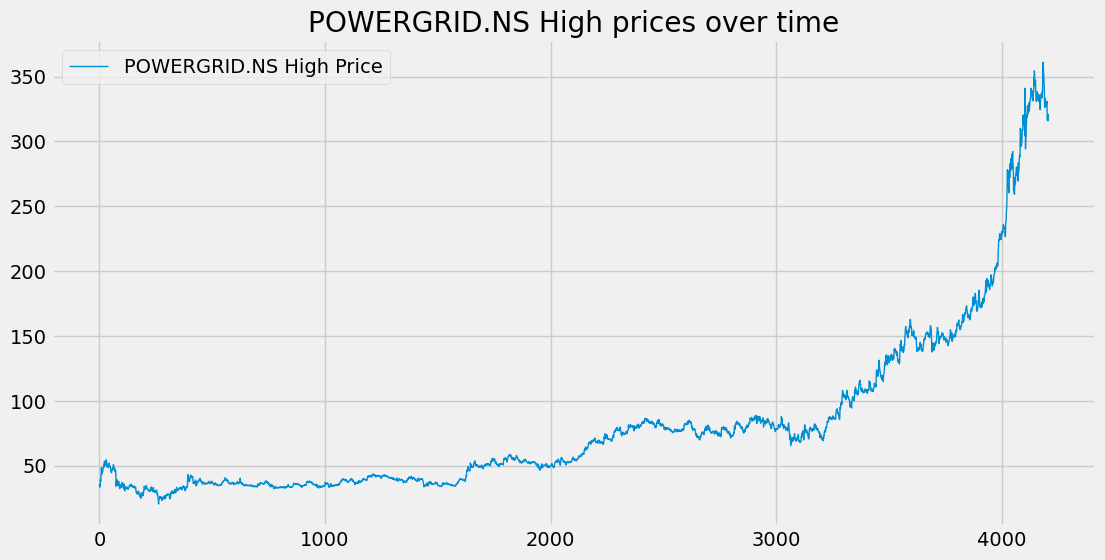

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

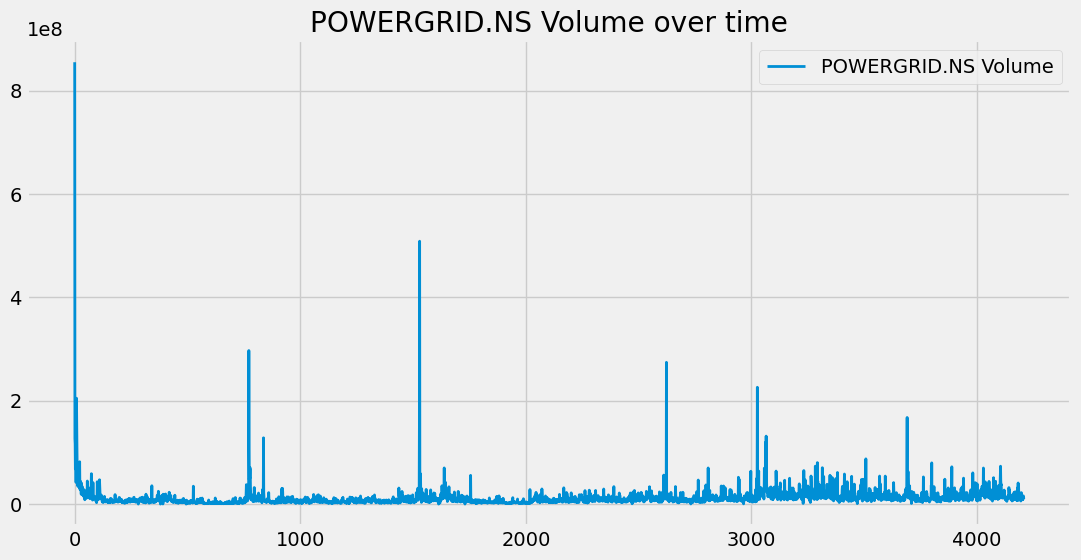

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [117]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [118]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [120]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [123]:
ma100 = df.Close.rolling(100).mean()

In [125]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4203,328.794317
4204,329.038712
4205,329.277425
4206,329.479302


In [127]:
ma200 = df.Close.rolling(200).mean()

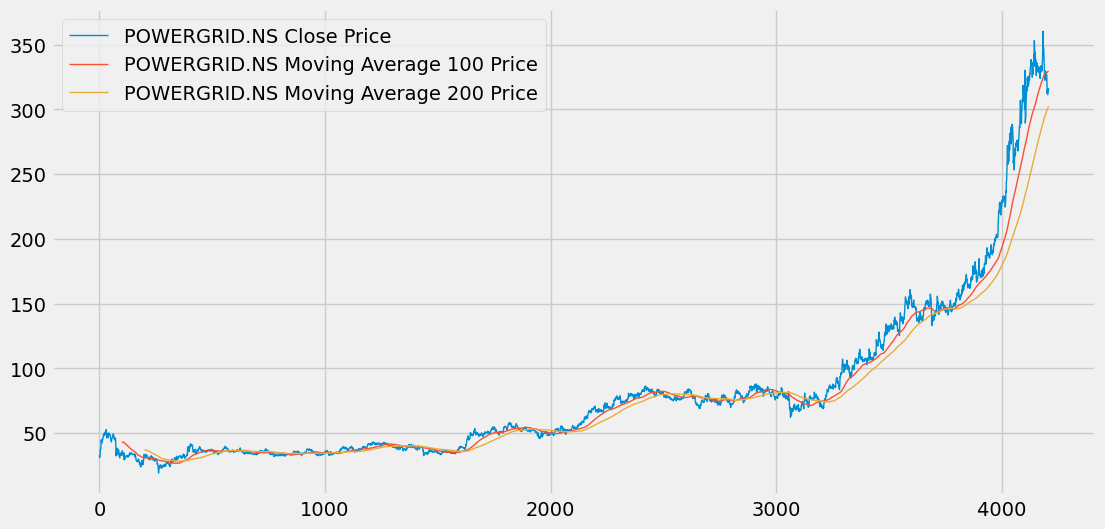

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [134]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [135]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

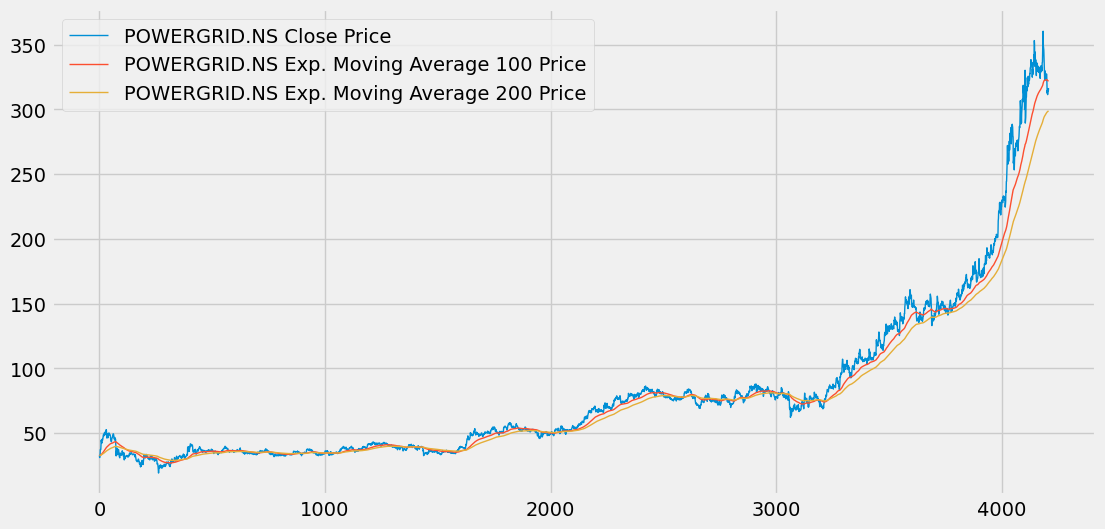

In [139]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [140]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [143]:
data_training.shape

(2945, 1)

In [145]:
data_testing.shape

(1263, 1)

In [147]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [151]:
data_training_array = scaler.fit_transform(data_training)

In [153]:
data_training_array

array([[0.19808612],
       [0.17371824],
       [0.20447382],
       ...,
       [0.90774438],
       [0.8600038 ],
       [0.87299644]])

In [155]:
data_training_array.shape[0]

2945

In [157]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [82]:
x_train.shape

(2845, 100, 1)

In [84]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [86]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\ArulPrakash A\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [87]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 38s 278ms/step - loss: 0.0025
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 270ms/step - loss: 0.0022
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 267ms/step - loss: 0.0022
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 271ms/step - loss: 0.0026
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - loss: 0.0021
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 271ms/step - loss: 0.0023
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - loss: 0.0027
Epoch 8/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 275ms/step - loss: 0.0026
Epoch 9/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 278ms/step - loss: 0.0021
Epoch 10/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - loss: 0.0022
Epoch 11/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - loss: 0.0021
Epoch 12/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 269ms/step - loss: 0.0020
Epoch 13/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 269ms/step - loss: 0.0023
Epoch 14/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 24s 272ms/step - loss: 0.0024
Epoch 15/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 25s 

In [95]:
past_100_days = data_training.tail(100)

In [ ]:
pip uninstall pandas


In [116]:
pip install pandas==1.5.3


Note: you may need to restart the kernel to use updated packages.Collecting pandas==1.5.3
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB 653.6 kB/s eta 0:00:08
      --------------------------------------- 0.1/5.2 MB 1.1 MB/s eta 0:00:05
     - -------------------------------------- 0.2/5.2 MB 1.7 MB/s eta 0:00:03
     -- ------------------------------------- 0.3/5.2 MB 1.7 MB/s eta 0:00:03
     ---- ----------------------------------- 0.6/5.2 MB 2.6 MB/s eta 0:00:02
     ------ --------------------------------- 0.8/5.2 MB 2.9 MB/s eta 0:00:02
     -------- ------------------------------- 1.1/5.2 MB 3.2 MB/s eta 0:00:02
     --------- ------------------------------ 1.3/5.2 MB 3.4 MB/s eta 0:00:02
     ------------ --------------------------- 1.6/5.2 MB 3.6 MB/s eta 0:00:02
     ------------- -------------------------- 1.8/5.2 MB 3.7 MB/

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2514 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-312\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-312\pandas
  creating build\lib.win-amd64-cpython-312\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-312\pandas\api
  creating build\lib.win-amd64-cpython-312\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-312\pandas\arrays
  creating build\lib.win-amd64-cpython-312\pand

In [101]:
#final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


#append() has been deprecate,instead use concat
#final_df = past_100_days.concat(data_testing, ignore_index = True)
final_df=pd.concat([past_100_days,data_testing], ignore_index = True)

In [103]:
final_df.head()

Ticker,POWERGRID.NS
0,76.617508
1,78.179443
2,78.446625
3,78.282227
4,78.734367


In [105]:
input_data = scaler.fit_transform(final_df)

In [107]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [109]:
x_test.shape

(1263, 100, 1)

In [117]:
y_predicted = model.predict(x_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step


In [119]:
y_predicted.shape

(1263, 1)

In [121]:
scaler.scale_

array([0.00335446])

In [123]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

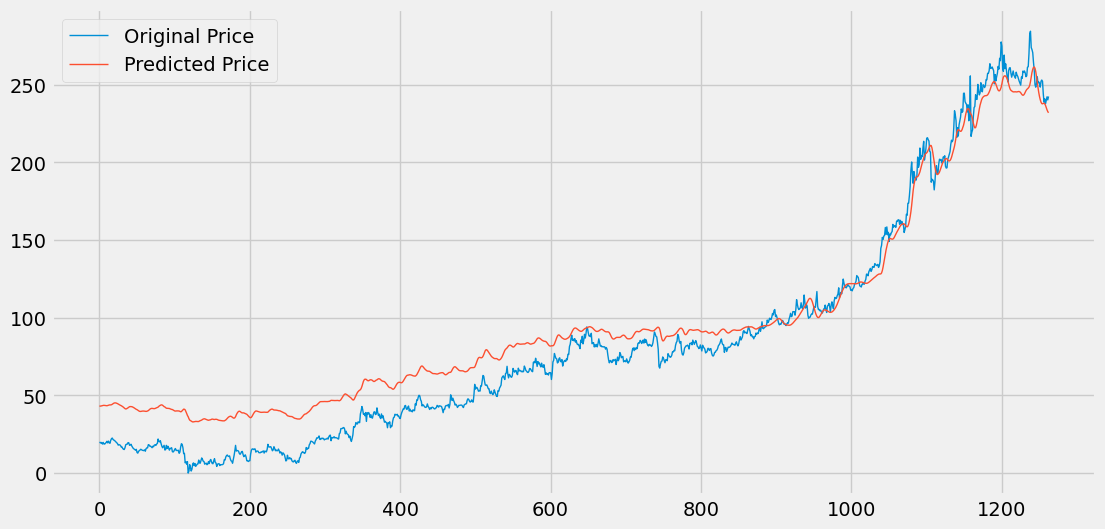

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [127]:
model.save('stock_dl_model.h5')